<a href="https://colab.research.google.com/github/GeunheeHan/2020-2-AI/blob/main/07_reg_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dense

In [5]:
import tensorflow as tf

x_train = [1,2,3,4]
y_train = [2,4,6,8]

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, input_shape=(1, ), activation='linear')
                                   
])

확률적 경사하강법(optimizer='SGD')

In [7]:

model.compile(optimizer='SGD', loss = 'mse',
              metrics=['mae', 'mse'])

In [6]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


히스토리 객체

매 에포크 마다의 훈련 손실값(loss)
훈련 정확도(accuracy)
검증 손실값(val_loss)
검증 정확도(val_acc)

In [8]:
history = model.fit(x_train,y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 36.5902 - mae: 5.5219 - mse: 36.5902
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 25.4119 - mae: 4.5832 - mse: 25.4119
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 17.6554 - mae: 3.8013 - mse: 17.6554
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 12.2732 - mae: 3.1500 - mse: 12.2732
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 8.5384 - mae: 2.6076 - mse: 8.5384
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 5.9468 - mae: 2.1558 - mse: 5.9468
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 4.1484 - mae: 1.7794 - mse: 4.1484
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 2.9004 - mae: 1.4660 - mse: 2.9004
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 2.0343 - mae: 1.2050 - mse: 2.0343
Epoch 10/500
1/1 [====================

성능평가

In [ ]:
#5. 테스트 데이터로 성능 평가
x_test = [1.2,2.3,3.4,4.5]
y_test = [2.4,4.6,6.8,9.0]

print('손실', model.evaluate(x_test, y_test))

1/1 [==============================] - 0s 2ms/step - loss: 8.7699e-04 - mae: 0.0264 - mse: 8.7699e-04
손실 [0.000876988226082176, 0.02641671895980835, 0.000876988226082176]


예측

In [ ]:
#x = [3.5,5,5.5,6] 예측
print(model.predict([3.5,5,5.5,6])) #출력값이 *2를 해주면 된다.

pred = model.predict([3.5,5,5.5,6])
#예측 값만 1차원으로

print(pred.flatten())
print(pred.squeeze())

[[ 6.9865546]
 [ 9.950532 ]
 [10.938524 ]
 [11.926517 ]]
[ 6.9865546  9.950532  10.938524  11.926517 ]
[ 6.9865546  9.950532  10.938524  11.926517 ]


손실과 mae 시각화

Text(0, 0.5, 'loss')

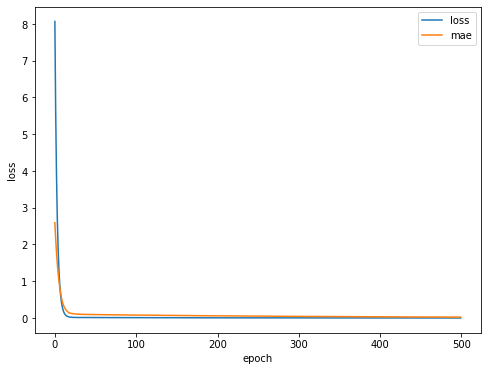

In [ ]:
import matplotlib.pylab as plt

#그래프 그리기
fig = plt.figure(figsize=(8,6))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
#plt.plot(history.history['mse'], label='mse')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

예측 값 시각화

Text(0, 0.5, 'y')

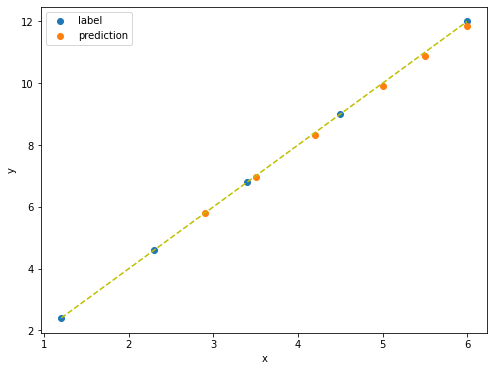

In [10]:
import matplotlib.pyplot as plt

x_test = [1.2,2.3,3.4,4.5,6.0]
y_test = [2.4,4.6,6.8,9.0,12.0]

#그래프 그리기
fig = plt.figure(figsize=(8,6))

plt.scatter(x_test, y_test, label='label')
plt.plot(x_test,y_test, 'y--')

x=[2.9,3.5,4.2,5,5.5,6]
pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

#label = 정답
#prediction = 정답에 맞는 1차원 그래프

전코드

In [11]:
#1.x 버전
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x_train = [1,2,3,4]
y_train = [2,4,6,8]

model = Sequential([
                    Dense(1, input_shape=(1,), activation = 'linear')
])

model.compile(optimizer='SGD', loss='mse', metrics=['mae','mse'])

model.summary()

model.fit(x_train,y_train, epochs=1000)

x_test = [1.2,2.3,3.4,4.5]
y_test = [2.4,4.6,6.8,9.0]
print('정확도', model.evaluate(x_test,y_test))

print(model.predict([3.5,5,5.5,6]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.5349 - mae: 1.1310 - mse: 1.5349
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0660 - mae: 0.9387 - mse: 1.0660
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7406 - mae: 0.7786 - mse: 0.7406
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5148 - mae: 0.6452 - mse: 0.5148
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3582 - mae: 0.5341 - mse: 0.3582
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2495 - mae: 0.4415 - mse: 0.2495
Epoch 7/1000

케라스로 예측
 y=2x+1 예측

In [12]:
#1. 케라스 패키지 임포트
import tensorflow as tf
import numpy as np

#2.데이터 지정
x= np.array([0,1,2,3,4])
y= np.array([1,3,5,7,9]) #y = x*2 +1


#3.인공신경망 모델 사용(구성)
model = tf.keras.models.Sequential()

#은닉 계층 하나 추가
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))

#4.#최적화 방법과 손실 함수 지정해 인공신경망 모델 생성
model.compile('SGD','mse')

#5. 생성된 모델로 훈련 데이터 학습
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

#6. 성능평가
print('Targets(정답):',y[3:])

#7. 테스트 데이터로 결과 예측
print('Predictions(예측):',model.predict(x[3:]).flatten())

Targets(정답): [7 9]
Predictions(예측): [6.996542 8.994398]
